In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#stats models
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

#import functions from the functions notebook
%run functions.ipynb
import import_ipynb
import functions

In [2]:
contributions = pd.read_csv('./data/canada_contribution_data.csv', 
                            index_col = 'fiscal/election_date', 
                            parse_dates =True )


C:\Users\wtlem\AppData\Local\Temp\ipykernel_6684\3204846671.py:1: DtypeWarning: Columns (4,6,8,9,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  contributions = pd.read_csv('./data/canada_contribution_data.csv',


In [3]:
contributions.head(2)

,political_entity,recipient,political_party_of_recipient,electoral_district,electoral_event,contributor_type,contributor_name,contributor_city,contributor_province,contributor_postal_code,contribution_received_date,monetary_amount,non_monetary_amount,leadership_contestant,total_contribution,election_year,year
fiscal/election_date,,,,,,,,,,,,,,,,,
1993-10-25,Candidate,"Langlois, Charles",conservative,Manicouagan,35th General Election,Registered parties,Ass. Conservatrice,NaN,NaN,NaN,NaN,5000.0,0.0,NaN,5000.0,1,1993
1993-10-25,Candidate,"Gray, Darryl L.",conservative,Bonaventure--Îles-de-la-Madeleine,35th General Election,Individuals,Jules Corriveau,NaN,NaN,NaN,NaN,100.0,0.0,NaN,100.0,1,1993


In [4]:
#check index is a datetime
type(contributions.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Group By Party

The following graphs show the importance of using the sum of contributions per year as the data after 1997 amalgamates contributions into the year or election date they take place in. The first graph of where daily sums of contributions show that only election days and year start/ends are counted.  

The second graph shows the yearly sum of contributions by party and reveals certain patterns. 
1. election years show spikes in contributions with a few exceptions such as 2021
2. From most to least contributions, Conservatives, Liberals, NDP then Bloc

I will attempt to forecast yearly contributions going forwards. 

In [6]:
group_party_mean = contributions[['total_contribution', 
               'political_party_of_recipient']].groupby(
                [pd.Grouper(freq='YE'), 'political_party_of_recipient' 
                 ])['total_contribution'].mean()


In [7]:
group_party_mean.head()

fiscal/election_date  political_party_of_recipient
1993-12-31            bloc_québécois                  419.481683
                      conservative                    563.187012
                      liberal                         625.022807
                      ndp                             608.347606
1994-12-31            bloc_québécois                  316.964142
Name: total_contribution, dtype: float64

## Plot: Daily Sum of Total Contributions by Party

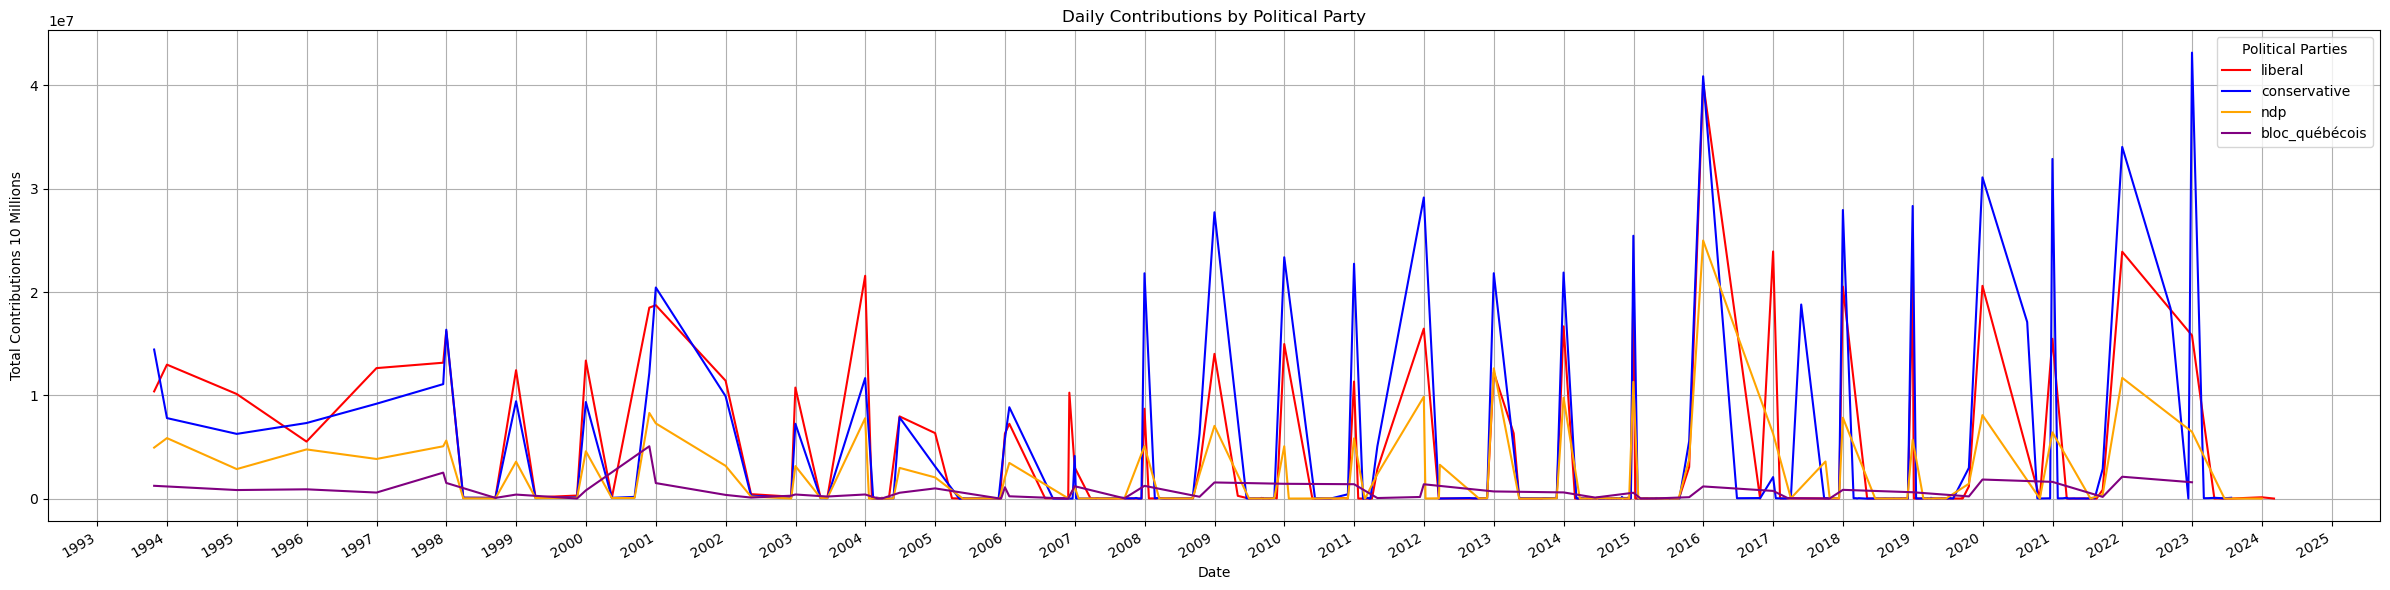

In [9]:
#Comments done with chat gpt
# Define the party list and corresponding color list
party_list = ['liberal', 'conservative', 'ndp', 'bloc_québécois']
color_list = ['red', 'blue', 'orange', 'purple']  # Correct color assignments

plt.figure(figsize = (24, 6))

# Plot contributions for each party
for party, color in zip(party_list, color_list):
    contributions[contributions['political_party_of_recipient'] == party] \
        .groupby('fiscal/election_date')['total_contribution'] \
        .sum() \
        .plot(label=party, color=color)

# Add legend and labels
plt.legend(title="Political Parties")
plt.title("Daily Contributions by Political Party")
plt.xlabel("Date")
plt.ylabel("Total Contributions 10 Millions")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()


In [10]:
contributions['year'].head()

fiscal/election_date
1993-10-25    1993
1993-10-25    1993
1993-10-25    1993
1993-10-25    1993
1993-10-25    1993
Name: year, dtype: int64

In [11]:
contributions['political_party_of_recipient'].value_counts()

political_party_of_recipient
conservative      2440473
liberal           1893773
ndp               1567630
bloc_québécois      78989
Name: count, dtype: int64

## Plot: Yearly Sum of Total Contributions by Party

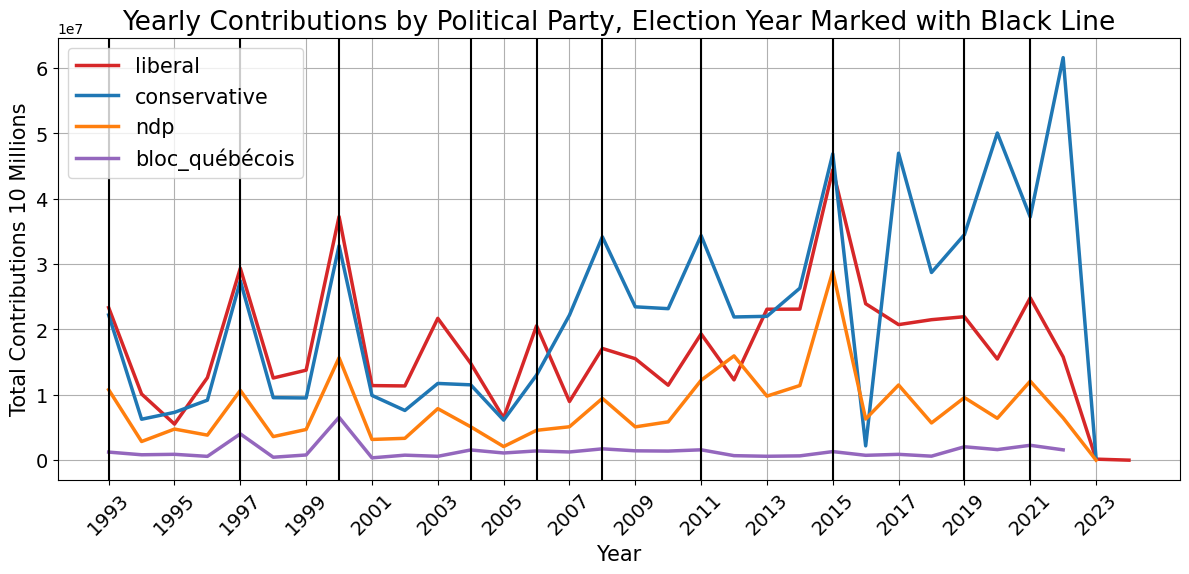

In [85]:
#Comments done with chat gpt
# Define the party list and corresponding color list
party_list = ['liberal', 'conservative', 'ndp', 'bloc_québécois']
color_list = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple']  # Correct color assignments
election_dates = [1993,1997,2000, 2004, 2006, 2008, 2011, 2015, 2019, 2021]

plt.figure(figsize = (12,6))

# Plot contributions for each party
for p, c in zip(party_list, color_list):
    contributions[contributions['political_party_of_recipient'] == p] \
        .groupby('year')['total_contribution'] \
        .sum() \
        .plot(label=p, color=c, linewidth = 2.5)

# Add legend and labels
plt.legend(fontsize = 15)
plt.title("Yearly Contributions by Political Party, Election Year Marked with Black Line",
         fontsize = 19)
plt.xlabel("Year", fontsize = 15)
plt.xticks(range(1993, 2024,2), rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Total Contributions 10 Millions",fontsize = 15)
plt.grid(True)
for e in election_dates:
    plt.axvline(e, color = 'k')
plt.tight_layout()


### Yearly Sum Interpretation

This will be my primary y variable for modeling as it 

## Plot: Number of Contributions by Party

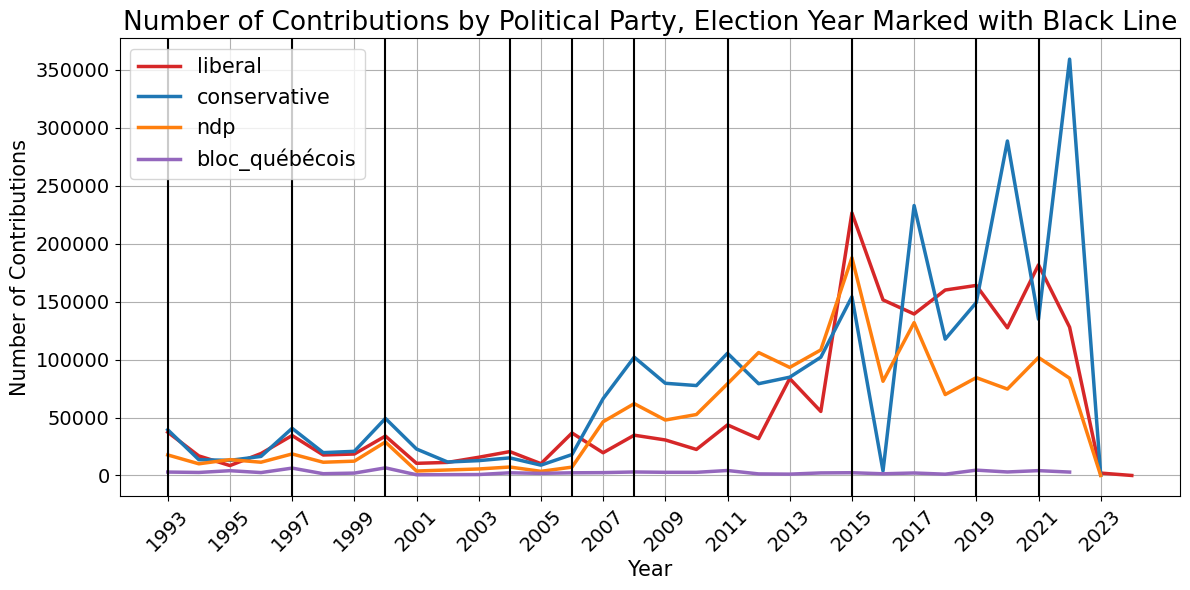

In [87]:
#Comments done with chat gpt
# Define the party list and corresponding color list
party_list = ['liberal', 'conservative', 'ndp', 'bloc_québécois']
color_list = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple']  # Correct color assignments
election_dates = [1993,1997,2000, 2004, 2006, 2008, 2011, 2015, 2019, 2021]

plt.figure(figsize = (12,6))

# Plot contributions for each party
for p, c in zip(party_list, color_list):
    contributions[contributions['political_party_of_recipient'] == p] \
        .groupby('year')['total_contribution'] \
        .count() \
        .plot(label=p, color=c, linewidth = 2.5)

# Add legend and labels
plt.legend(fontsize = 15)
plt.title("Number of Contributions by Political Party, Election Year Marked with Black Line",
          fontsize = 19)
plt.xlabel("Year", fontsize = 15)
plt.xticks(range(1993, 2024, 2), rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Number of Contributions", fontsize = 15)
plt.grid(True)
for e in election_dates:
    plt.axvline(e, color = 'k')
plt.tight_layout()

In [17]:
contributions.index.value_counts()

fiscal/election_date
2015-12-31    550758
2022-12-31    445213
2021-12-31    416366
2019-12-31    393048
2020-12-31    377925
               ...  
2014-08-14         1
2014-07-30         1
2014-07-17         1
2011-02-16         1
2015-03-26         1
Name: count, Length: 766, dtype: int64

### Number of Contribution Interpretation

There is a clear upward trend in the number of contributions given to each party, except for the Bloc, which remains constant. This trend is likely not explained by changes in population. Looking at Canada's population data shows that Canada's population is increasing logarithmically with no particular unusual change after 2006. Other possibilities include an increasing interest in politics by the average Canadian, perhaps do to increasing polity.  

Election years also see a marked increase in number of contributions as expected. 

## Plot: Mean of Total Contributions by Party

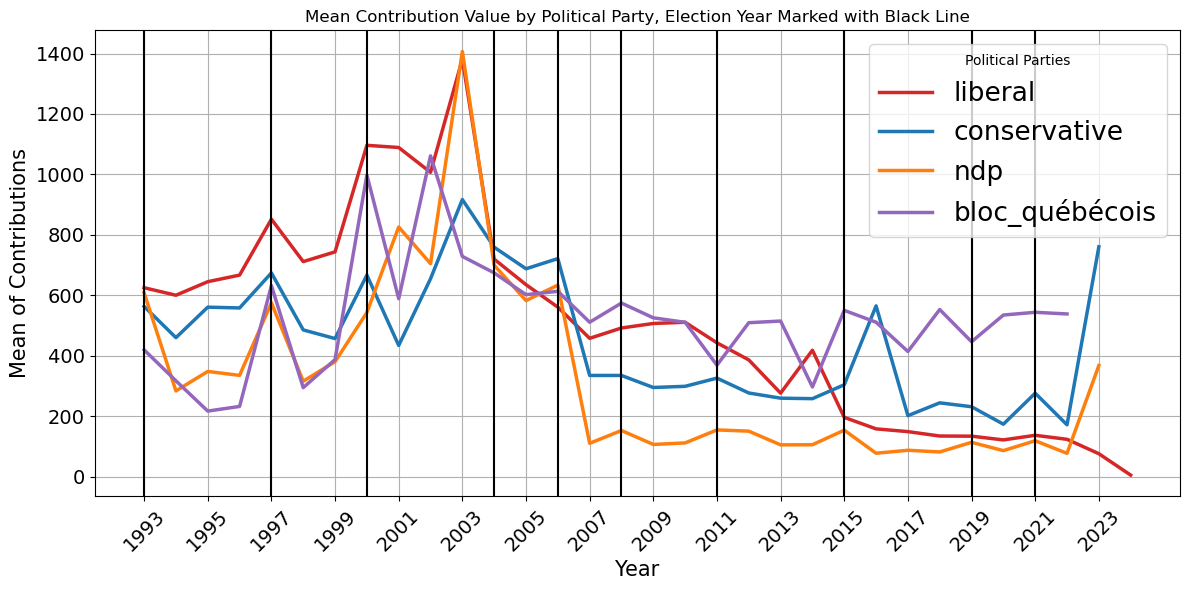

In [96]:
#Comments done with chat gpt
# Define the party list and corresponding color list
party_list = ['liberal', 'conservative', 'ndp', 'bloc_québécois']
color_list = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple']  # Correct color assignments
election_dates = [1993,1997,2000, 2004, 2006, 2008, 2011, 2015, 2019, 2021]

plt.figure(figsize = (12,6))

# Plot contributions for each party
for p, c in zip(party_list, color_list):
    contributions[contributions['political_party_of_recipient'] == p] \
        .groupby('year')['total_contribution'] \
        .mean() \
        .plot(label=p, color=c, linewidth = 2.5)

# Add legend and labels
plt.legend(title="Political Parties", fontsize = 19)
plt.title("Mean Contribution Value by Political Party, Election Year Marked with Black Line")
plt.xlabel("Year", fontsize = 15)
plt.xticks(range(1993, 2024, 2), rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Mean of Contributions", fontsize = 15)
plt.grid(True)
for e in election_dates:
    plt.axvline(e, color = 'k')
plt.tight_layout()

### Mean Contribution Interpretation

There is a clear reduction of contribution size starting in 2004, likely from the 2003 election financing bill, which prevented organizations such as unions, corporations, and other organizations from donating more than $1000 with adjustments for inflation. Before 2004 election years had higher average mean contributions but after 2004 election year no effect on the value size of donation. This means that organizations donate larger amounts than individuals. The change in contribution habits means that 2004 is an inflection point where donation patterns changed. I will add a binary column with pre_2004 with 1 for before and 0 for after so that this change is incorporated in my modeling.  

# Checking Stationarity with ADFUller Test

In [23]:
adfull_test = adfuller(contributions[['total_contribution', 'year']]\
                .groupby('year')['total_contribution']\
                .sum())
print(f'ADFuller Test\'s')
print(f' All: P-Value =  {adfull_test[1]}')

for p in party_list:
    
    adfull_test = adfuller(contributions[['total_contribution', 'year']]\
             .loc[contributions['political_party_of_recipient'] == p]\
             .groupby('year')['total_contribution']\
             .sum())
    print(f' {p}: P-Value = {adfull_test[1]}') 
    


ADFuller Test's
 All: P-Value =  0.0002467162015278731
 liberal: P-Value = 0.0006038254919223767
 conservative: P-Value = 0.9501015661896446
 ndp: P-Value = 8.47377080409719e-05
 bloc_québécois: P-Value = 5.44837467000206e-05


## ADFuller Interpretation

All adfuller tests come back stationary as their P-Values are less than 0.05, except for the conservatives who failed the test. 

# Trends and Seasonality

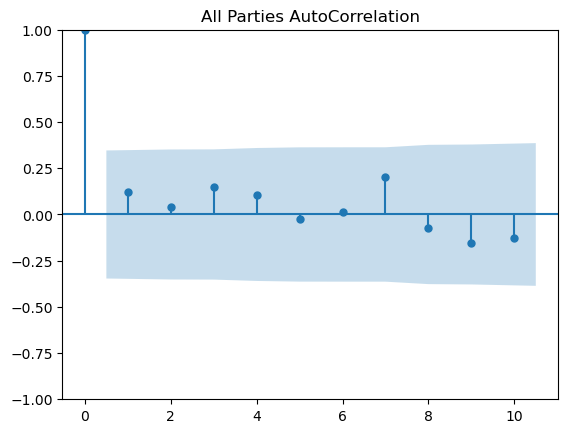

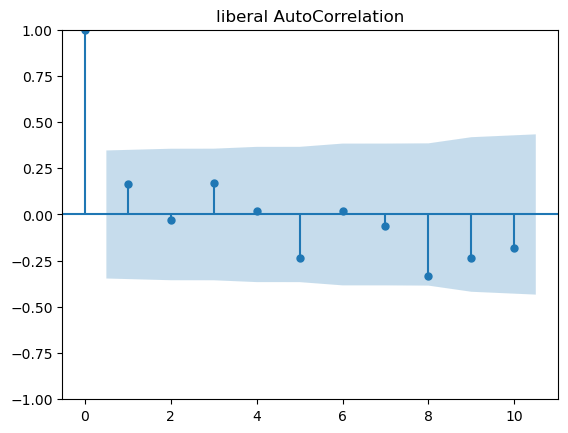

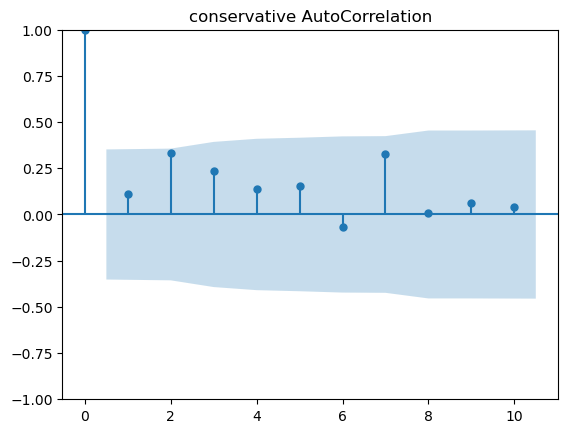

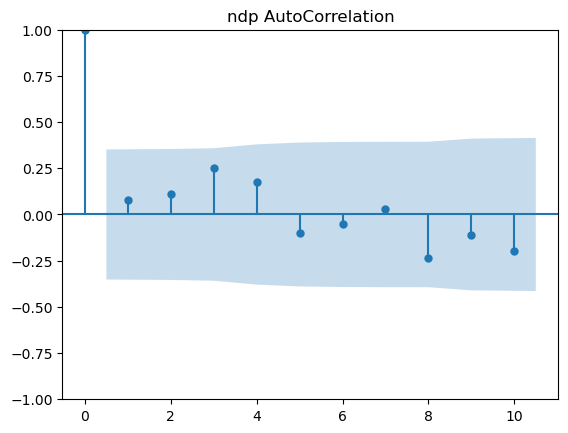

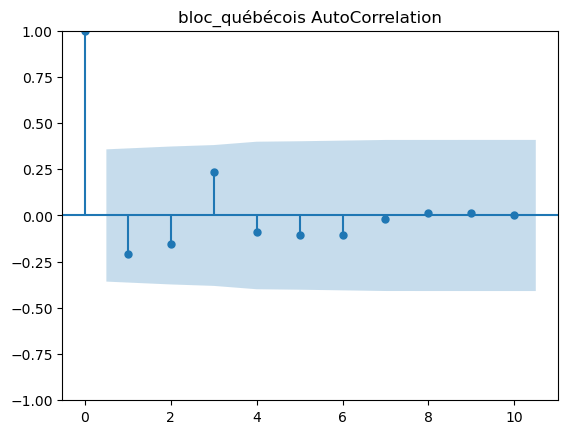

In [26]:
#create autocorrelation for the total contribution column
plot_acf(contributions[['total_contribution', 'year']]\
             .groupby('year')['total_contribution']\
             .sum(), lags = 10) #lag 10 chosen because data goes back about 30 years 
plt.title('All Parties AutoCorrelation')

#create autocorrelation for all of the parties
for p in party_list:
    plot_acf(contributions[['total_contribution', 'year']]\
             .loc[contributions['political_party_of_recipient'] == p]\
             .groupby('year')['total_contribution']\
             .sum(), lags = 10)   
    plt.title(f'{p} AutoCorrelation')


## ACF Plot Interpretation

There are no trends or seasonality in the sum of total contributions data as indicated by all autocorrelations after the first being statistically insignificant. The data is not random as indicated by the the first autocorrelation being 1.